In [4]:
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

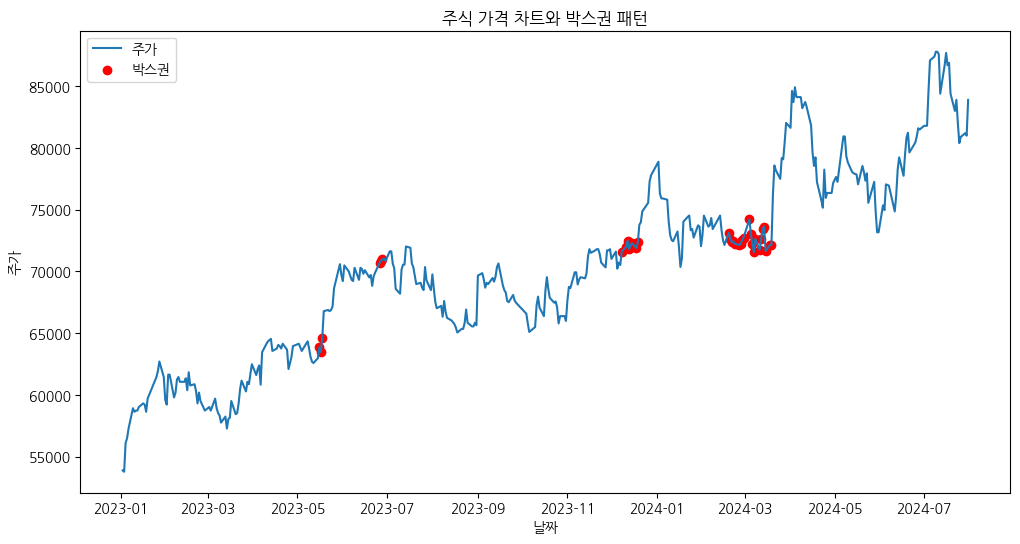

박스권 기간: 35 일
전체 기간 대비 박스권 비율: 9.00%


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_boxed_range(df, window=20, threshold=0.05):
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['rolling_low'] = df['Low'].rolling(window=window).min()
    
    df['range'] = (df['rolling_high'] - df['rolling_low']) / df['rolling_low']
    
    boxed_range = df[df['range'] < threshold]
    return boxed_range

def plot_stock_with_boxed_range(df, boxed_range):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='주가')
    plt.scatter(boxed_range.index, boxed_range['Close'], color='red', label='박스권')
    plt.title('주식 가격 차트와 박스권 패턴')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "005930.KS"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    boxed_range = identify_boxed_range(df)
    plot_stock_with_boxed_range(df, boxed_range)
    
    print(f"박스권 기간: {len(boxed_range)} 일")
    print(f"전체 기간 대비 박스권 비율: {len(boxed_range) / len(df) * 100:.2f}%")

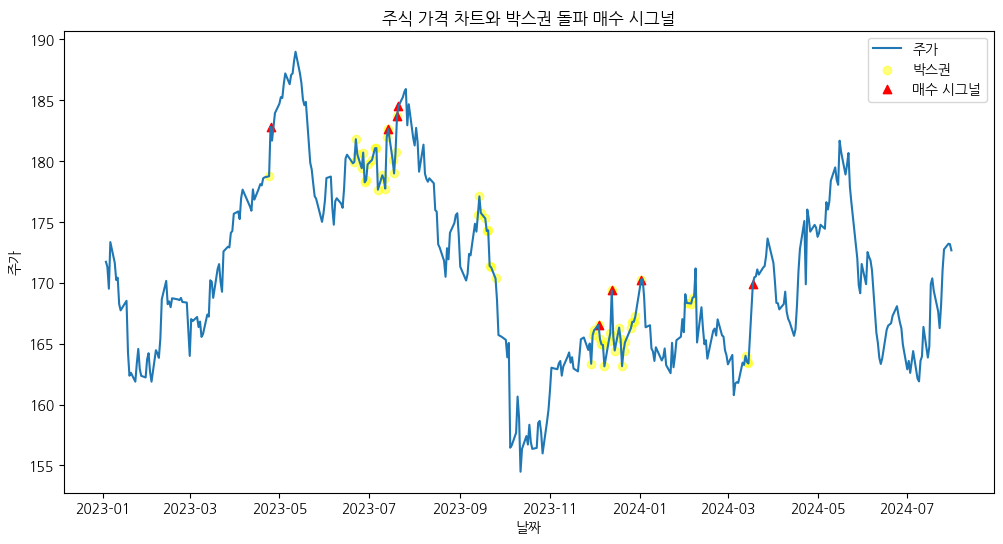

총 수익률: -3.66%
샤프 비율: -1.04
총 매수 시그널 횟수: 8
                                Close  upper_bound
Date                                              
2023-04-25 00:00:00-04:00  182.814545   183.267448
2023-07-14 00:00:00-04:00  182.636017   183.043576
2023-07-20 00:00:00-04:00  183.693756   184.363324
2023-07-21 00:00:00-04:00  184.528275   185.799476
2023-12-04 00:00:00-05:00  166.545807   167.313842
2023-12-13 00:00:00-05:00  169.371780   169.411175
2024-01-02 00:00:00-05:00  170.257980   170.336755
2024-03-18 00:00:00-04:00  169.920166   170.832967


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

def identify_boxed_range(df, window=20, threshold=0.05):
    df['rolling_high'] = df['High'].rolling(window=window).max()
    df['rolling_low'] = df['Low'].rolling(window=window).min()
    
    df['range'] = (df['rolling_high'] - df['rolling_low']) / df['rolling_low']
    
    df['is_boxed'] = df['range'] < threshold
    return df

def find_breakout_signals(df, window=20):
    df['upper_bound'] = df['High'].rolling(window=window).max()
    df['breakout'] = (df['Close'] > df['upper_bound'].shift(1)) & (df['is_boxed'].shift(1))
    return df

def plot_stock_with_signals(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='주가')
    plt.scatter(df[df['is_boxed']].index, df[df['is_boxed']]['Close'], color='yellow', label='박스권', alpha=0.5)
    plt.scatter(df[df['breakout']].index, df[df['breakout']]['Close'], color='red', label='매수 시그널', marker='^')
    plt.title('주식 가격 차트와 박스권 돌파 매수 시그널')
    plt.xlabel('날짜')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

def backtest_strategy(df):
    df['position'] = df['breakout'].astype(int)
    df['returns'] = df['Close'].pct_change()
    df['strategy_returns'] = df['position'].shift(1) * df['returns']
    
    total_return = (1 + df['strategy_returns']).prod() - 1
    sharpe_ratio = df['strategy_returns'].mean() / df['strategy_returns'].std() * np.sqrt(252)
    
    print(f"총 수익률: {total_return:.2%}")
    print(f"샤프 비율: {sharpe_ratio:.2f}")

# 메인 실행 코드
if __name__ == "__main__":
    ticker = "PEP"  # 삼성전자 주식 코드
    start_date = "2023-01-01"
    end_date = "2024-08-01"
    
    df = get_stock_data(ticker, start_date, end_date)
    df = identify_boxed_range(df)
    df = find_breakout_signals(df)
    
    plot_stock_with_signals(df)
    backtest_strategy(df)
    
    print(f"총 매수 시그널 횟수: {df['breakout'].sum()}")
    print(df[df['breakout']][['Close', 'upper_bound']])